# Cluster Analysis

This notebook details the process of clustering the different financial institutions in the West African Economic and Moetary Union (UEMOA). Initially I thought of clustering the member countries themselves but given they are just 8 and posess quite a diverse economic landscape, I thought it would be more effective if I concentrated efforts on the financial insitutions in the countries themselves.

### Analysis Plan

1. Definition of the analysis goal and selecting the most significant variables
2. Processing the numerical variables 
3. Selecting clustering procedure
4. Selecting method for data aggregation
5. Choosing the unit of measure or algorithm for the distance between entities
6. Identification of optimum number of clusters
7. Generating the clusters

## 1. Definition of the analysis goal and selecting the most significant variables

### Goal of the analysis

The goal of the present analysis is to identify resembling credit institutions, which can be included into homogenous groups, according to a series of prudential and profitability indicators. Our study aims to provide an alternative to the peer group 
techniques, implemented by supervisory authorities in the process of off-site surveillance.

According to this technique, credit institutions are, firstly, grouped by size or volume of activity, and then, for each group, are made comparative analyses between the current values of financial indicators and the previous ones. The 
disadvantage stems from the fact that this method cannot signal the impairment in the financial condition of the whole group, but only the distress of a particular credit institution in that group.

Unlike it, cluster analysis, as an exploratory technique, allows the comparisons between all credit institutions in the sample, classifying them into a certain group, according to the similarities identified. The core principle of this technique is that of minimization of the variance between the components of a group, simultaneously with the maximization of the variance across groups. In this way, one can notice the degree of group stability over time.

### Metrics in the analysis

The study is being conducted for the period between 2013 and 2019 with data collected from 106 banks on an annual basis.

- Countries_Num: Numeric code representing the 8 countries in the West African Economic and Monetary Union (ranges from 1 to 8).

- id: An identifier for each bank in the dataset.

- Countries: Categorical variable indicating the names of the countries in the West African Economic and Monetary Union.

- Banks: Categorical variable representing the names of the banks within the specified countries.

- Year: Integer variable indicating the year in which the data was recorded.

- RIR (Risk Index Rating): A measure assessing the level of risk associated with financial institutions.

- SFS (Solvency and Financial Stability): A metric indicating the financial health and stability of the banks.

- INF (Inflation Rate): Represents the inflation rate, a measure of the general rise in prices over a period of time.

- ERA (Economic Risk Assessment): An evaluation of the potential economic risks within the banking sector.

- INL (Internationalization Level): Indicates the extent to which banks are involved in international activities.

- Zscore: A metric used as a measure of a bank's financial health and the likelihood of it going bankrupt in the next two years.

- DEBT (Debt Level): Represents the amount of debt held by the banks.

- SIZE: Represents the size of the banks, typically measured by total assets or other relevant financial metrics.

- CC (Capital Adequacy): A measure of a bank's capital in relation to its risk-weighted assets.

- GE (Governance and Ethics): Evaluates the governance practices and ethical standards within the banking institutions.

- PS (Profitability and Sustainability): Assesses the profitability and sustainability of the banks.

- RQ (Regulatory Compliance): Measures the extent to which banks adhere to regulatory requirements.

- RL (Liquidity Risk): Evaluates the risk associated with a bank's ability to meet its short-term obligations.

- VA (Value Added): Indicates the value added by the banks to the overall economic environment.

In [1]:
#loading necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#block out warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
#loading the data set 
uemoa_df = pd.read_csv('uemoa_banking.csv')
uemoa_df.head(2)

,Countries_Num,id,Countries,Banks,Year,RIR,SFS,INF,ERA,INL,Zscore,DEBT,SIZE,CC,GE,PS,RQ,RL,VA
0,1,1,Bénin,Banque Atlantique Bénin,2013,3.836593,26.861971,0.428889,3.196428,12.076596,0.973123,18.503746,12.222694,24.64455,36.96682,58.29384,37.44076,34.27230,55.86855
1,1,1,Bénin,Banque Atlantique Bénin,2014,5.599992,29.965430,-0.548758,3.045024,8.884912,1.098355,22.282075,12.271219,29.80769,36.05769,47.14286,31.25000,36.05769,57.14286


In [4]:
uemoa_df.dtypes

Countries_Num      int64
id                 int64
Countries         object
Banks             object
Year               int64
RIR              float64
SFS              float64
INF              float64
ERA              float64
INL              float64
Zscore           float64
DEBT             float64
SIZE             float64
CC               float64
GE               float64
PS               float64
RQ               float64
RL               float64
VA               float64
dtype: object

In [5]:
#list of columns in the dataset
uemoa_df.columns

Index(['Countries_Num', 'id', 'Countries', 'Banks', 'Year', 'RIR', 'SFS',
       'INF', 'ERA', 'INL', 'Zscore', 'DEBT', 'SIZE', 'CC', 'GE', 'PS', 'RQ',
       'RL', 'VA'],
      dtype='object')

In [6]:
uemoa_df.isnull().sum()

Countries_Num    0
id               0
Countries        0
Banks            0
Year             0
RIR              0
SFS              0
INF              0
ERA              0
INL              0
Zscore           0
DEBT             0
SIZE             0
CC               0
GE               0
PS               0
RQ               0
RL               0
VA               0
dtype: int64

In [7]:
#number of unique banks in the dataset
unique_banks_per_country = uemoa_df.groupby('Countries')['Banks'].nunique()
unique_banks_per_country

Countries
 Togo            12
Burkina Faso     13
Bénin            11
Côte d'Ivoire    23
GUINEE-BISSAU     3
Mali             13
Niger            11
Sénégal          20
Name: Banks, dtype: int64

**Available metrics for the analysis**

In [8]:
metrics = ['RIR', 'SFS', 'INF', 'ERA', 'INL', 'Zscore', 'DEBT', 'SIZE', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']
uemoa_df[metrics].head()

,RIR,SFS,INF,ERA,INL,Zscore,DEBT,SIZE,CC,GE,PS,RQ,RL,VA
0,3.836593,26.861971,0.428889,3.196428,12.076596,0.973123,18.503746,12.222694,24.64455,36.96682,58.29384,37.44076,34.27230,55.86855
1,5.599992,29.965430,-0.548758,3.045024,8.884912,1.098355,22.282075,12.271219,29.80769,36.05769,47.14286,31.25000,36.05769,57.14286
2,4.266334,30.984761,0.218786,2.394557,8.583933,0.649069,30.900230,12.511530,33.17308,30.28846,45.23809,30.76923,33.65385,58.62069
3,4.580100,29.832095,-0.794050,3.712403,5.720476,0.846807,35.923350,12.599141,34.13462,33.65385,47.14286,30.28846,30.76923,60.09852
4,7.329021,28.630991,1.769412,3.833422,6.256669,0.599062,39.598463,12.706508,33.17308,26.44231,47.14286,33.17308,30.28846,58.12808


## 2. Processing the Metrics

**Reviewing the data for outliers**

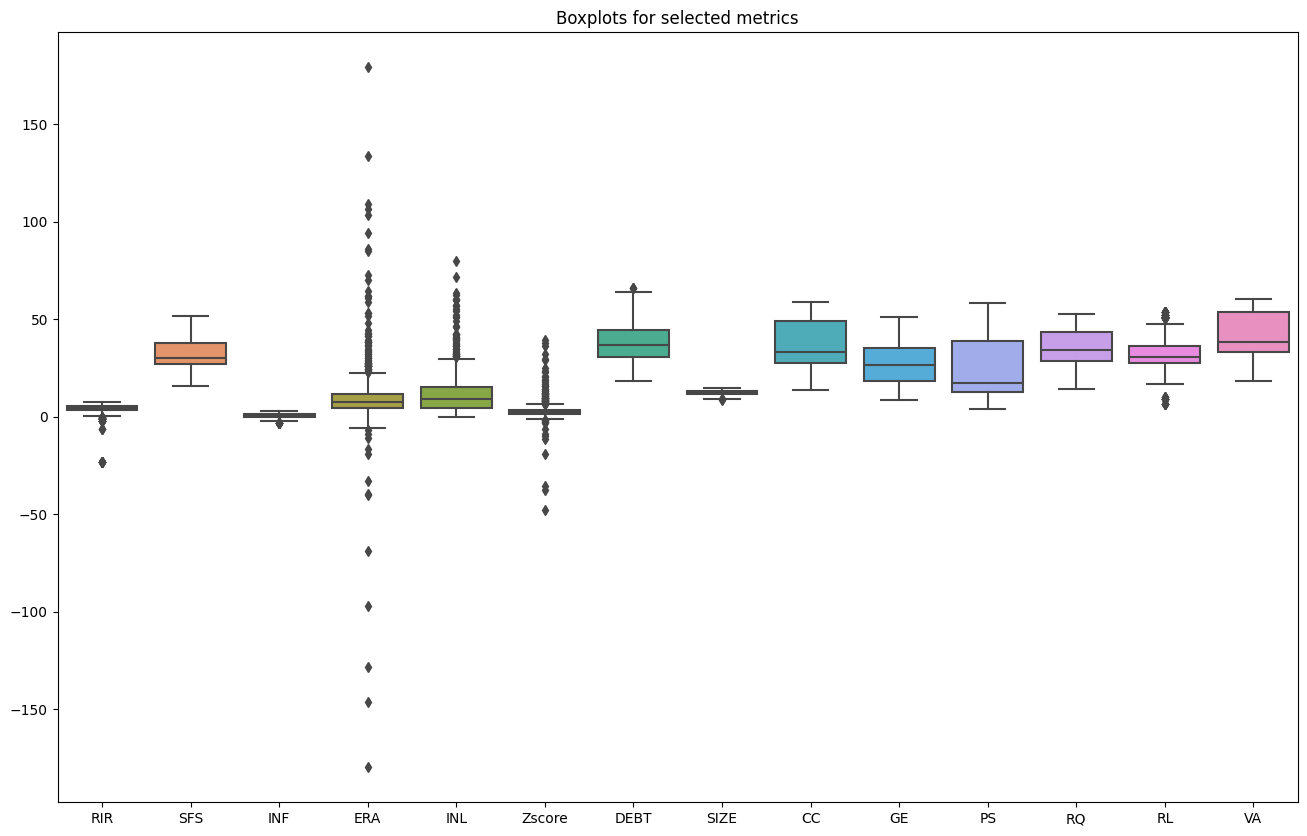

In [9]:
# Visualize the distribution of selected metrics using boxplots
plt.figure(figsize=(16, 10))
sns.boxplot(data=uemoa_df[metrics], orient='v')
plt.title('Boxplots for selected metrics')
plt.show()

The chart indicates that some of the metrics possess outliers and are not normally distributed so we'll use Z score to standardize the data as it will be more robust and is not as sensitive to extreme values

**Standardizing the data**

In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
standardized_features = scaler.fit_transform(uemoa_df[metrics])

# Replace the original features with the standardized ones in your dataset
uemoa_df[['RIR', 'SFS', 'INF', 'ERA', 'INL', 'Zscore',
          'DEBT', 'SIZE', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']] = standardized_features
uemoa_df.head()

,Countries_Num,id,Countries,Banks,Year,RIR,SFS,INF,ERA,INL,Zscore,DEBT,SIZE,CC,GE,PS,RQ,RL,VA
0,1,1,Bénin,Banque Atlantique Bénin,2013,0.030398,-0.619813,-0.075473,-0.346668,0.038999,-0.389639,-1.739593,0.130214,-1.005347,0.996544,2.335223,0.212167,0.159764,1.337081
1,1,1,Bénin,Banque Atlantique Bénin,2014,0.459313,-0.242886,-0.846236,-0.354656,-0.254408,-0.365178,-1.415444,0.173776,-0.594954,0.907887,1.578303,-0.441714,0.335980,1.452254
2,1,1,Bénin,Banque Atlantique Bénin,2015,0.134925,-0.119084,-0.241115,-0.388977,-0.282077,-0.452934,-0.676080,0.389507,-0.327455,0.345281,1.449009,-0.492493,0.098724,1.585820
3,1,1,Bénin,Banque Atlantique Bénin,2016,0.211243,-0.259080,-1.039621,-0.319443,-0.545310,-0.414311,-0.245139,0.468157,-0.251027,0.673468,1.578303,-0.543273,-0.185985,1.719387
4,1,1,Bénin,Banque Atlantique Bénin,2017,0.879869,-0.404959,0.981377,-0.313058,-0.496019,-0.462702,0.070154,0.564543,-0.327455,-0.029789,1.578303,-0.238594,-0.233437,1.541298


#### Handling of outliers

During exploratory data analysis (EDA), I discovered that most of the outliers in the data could be explained by changes in the security, political or economic landscape of particular countries in the UEMOA block. These occurences are not rare or new and history suggests the chances of these events occuring can not be ignored.

For that reason eliminating the outliers or even reducing their impact risks creating a big divide between the theory of the analysis and the practicality of the financial landscape in the UEMOA countries. However, leaving them as they are can also present an unrealistic view beacuse of the ectremity of some of the ouliers.
Perhaps the best course of action is to perform senstivity analysis to assess how different treatments of outliers impact the results. So we'll consider the treatments below;


1. **Not Treating Outliers at All:**
   - **Advantages:**
     - Preserves the original data, allowing for a more accurate representation of extreme events.
     - Maintains the real-world context and practicality of the financial landscape.
   - **Considerations:**
     - The impact of extreme values may dominate the analysis, affecting the interpretability of results.
     - Sensitivity to outliers may vary across clustering algorithms.

2. **Winsorizing:**
   - **Advantages:**
     - Mitigates the influence of extreme values by capping them at a certain percentile.
     - Maintains a degree of realism while reducing the impact of outliers.
   - **Considerations:**
     - Choosing an appropriate percentile for Winsorization may require careful consideration.
     - It may not be suitable if outliers provide critical insights into the financial landscape.

3. **Using a Log Scale:**
   - **Advantages:**
     - Log transformation can compress the range of extreme values, making the distribution more symmetric.
     - Useful for data with a positive skewness.
   - **Considerations:**
     - Appropriate for metrics with positive values; not suitable for zero or negative values.
     - May not fully address extreme values in cases of high variability.

4. **Outlier Labeling:**
   - **Advantages:**
     - Recognizes and distinguishes outliers as a separate category.
     - Allows for the inclusion of extreme events without directly influencing clustering.
   - **Considerations:**
     - Interpretation becomes critical, and the impact of outliers needs to be assessed in the context of the analysis.
     - Some clustering algorithms may not handle labeled outliers effectively.

5. **Eliminating Outliers:**
   - **Advantages:**
     - Provides a clean dataset for clustering, reducing the influence of extreme values.
     - May enhance the interpretability of clusters.
   - **Considerations:**
     - Loss of potentially valuable information about extreme events.
     - The potential for a divide between the theoretical analysi
    
Given the context of the financial landscape in UEMOA countries, outlier labeling aligns well with the goal of capturing and understanding extreme events without completely removing them from the analysis. However, it's important to conduct sensitivity analyses and carefully interpret the results to ensure that the labeled outliers contribute meaningfully to the overall insights.l strengthen the credibility of your findings.

#### Labeling of Outliers

Display standardized boxplot

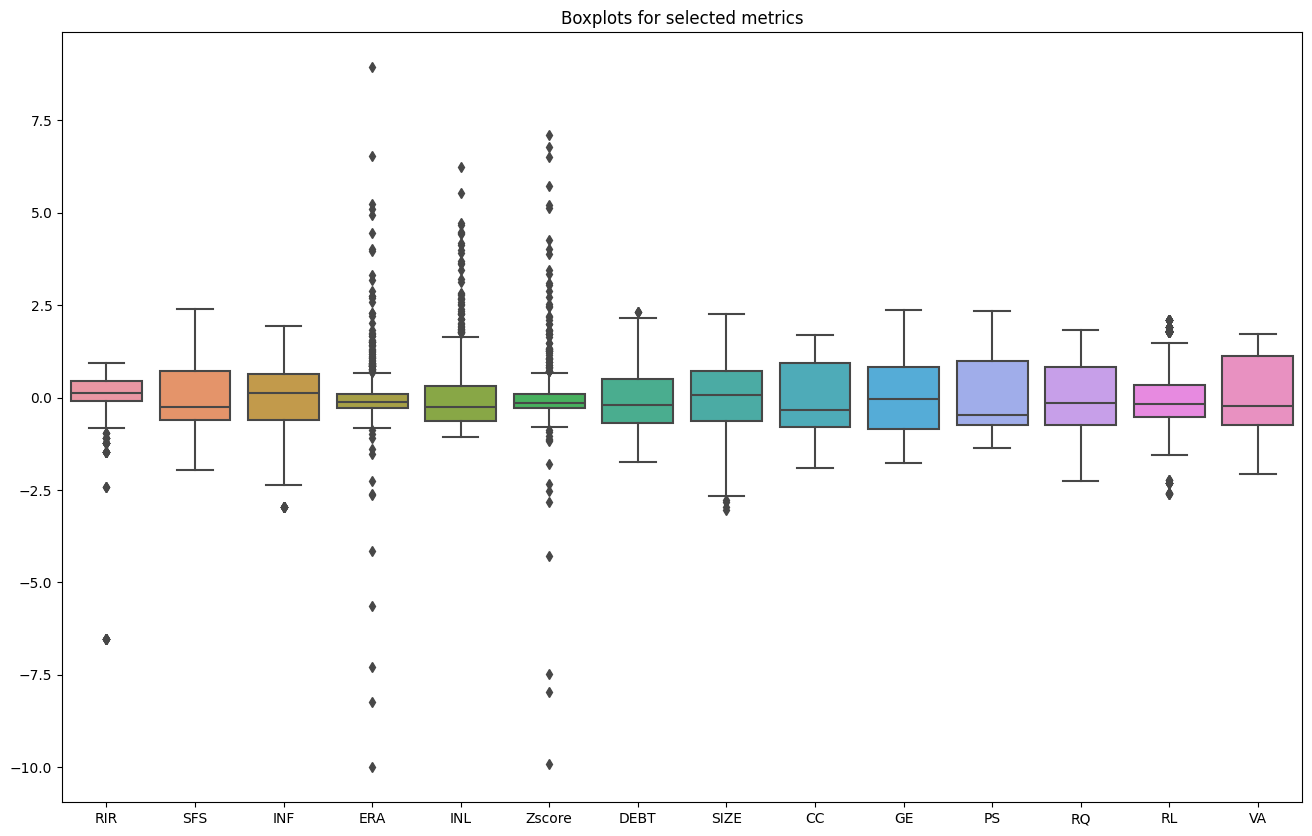

In [11]:
# Visualize the distribution of selected metrics using boxplots
plt.figure(figsize=(16, 10))
sns.boxplot(data=uemoa_df[metrics], orient='v')
plt.title('Boxplots for selected metrics')
plt.show()

#### Assigning thresholds to metrics

In [12]:
# Define thresholds for positive and negative outliers for each metric
thresholds = {
    'RIR': {'positive': 1.0, 'negative': -1.0},
    'INF': {'positive': 2.0, 'negative': -1.5},
    'ERA': {'positive': 0.6, 'negative': -0.4},
    'INL': {'positive': 0.85, 'negative': -0.8},
    'Zscore': {'positive': 0.5, 'negative': -0.5},
    'RL': {'positive': 1.0, 'negative': -2.0},
}

# Create a new column 'Outlier_Label' and initialize it with 'Not Outlier'
uemoa_df['Outlier_Label'] = 'Not Outlier'

# Assign 'Outlier' label based on positive and negative thresholds for each metric
for metric, threshold_values in thresholds.items():
    positive_outlier_criteria = uemoa_df[metric] > threshold_values['positive']
    negative_outlier_criteria = uemoa_df[metric] < threshold_values['negative']

    uemoa_df.loc[positive_outlier_criteria, 'Outlier_Label'] = 'Positive Outlier'
    uemoa_df.loc[negative_outlier_criteria, 'Outlier_Label'] = 'Negative Outlier'

# Display the updated DataFrame
display(uemoa_df[['Countries', 'Banks', 'RIR', 'INF','ERA', 'INL', 'Zscore', 'RL', 'Outlier_Label']])


,Countries,Banks,RIR,INF,ERA,INL,Zscore,RL,Outlier_Label
0,Bénin,Banque Atlantique Bénin,0.030398,-0.075473,-0.346668,0.038999,-0.389639,0.159764,Not Outlier
1,Bénin,Banque Atlantique Bénin,0.459313,-0.846236,-0.354656,-0.254408,-0.365178,0.335980,Not Outlier
2,Bénin,Banque Atlantique Bénin,0.134925,-0.241115,-0.388977,-0.282077,-0.452934,0.098724,Not Outlier
3,Bénin,Banque Atlantique Bénin,0.211243,-1.039621,-0.319443,-0.545310,-0.414311,-0.185985,Not Outlier
4,Bénin,Banque Atlantique Bénin,0.879869,0.981377,-0.313058,-0.496019,-0.462702,-0.233437,Not Outlier
...,...,...,...,...,...,...,...,...,...
737,Togo,Union Togolaise de Banque,-0.509179,1.623512,-0.261709,-0.690562,-0.313455,-0.945208,Not Outlier
738,Togo,Union Togolaise de Banque,-6.530678,0.599668,-0.321449,0.040352,0.179932,-0.233437,Negative Outlier
739,Togo,Union Togolaise de Banque,0.459058,-1.186449,-0.623237,-0.665835,-0.934293,-0.755402,Negative Outlier
740,Togo,Union Togolaise de Banque,-1.242547,0.318154,-0.885590,-0.641248,-1.045439,-0.328340,Negative Outlier


#### Checking distribution of outliers

In [13]:
uemoa_df['Outlier_Label'].value_counts()

Outlier_Label
Not Outlier         275
Positive Outlier    249
Negative Outlier    218
Name: count, dtype: int64

#### Checking the metrics for correlation 

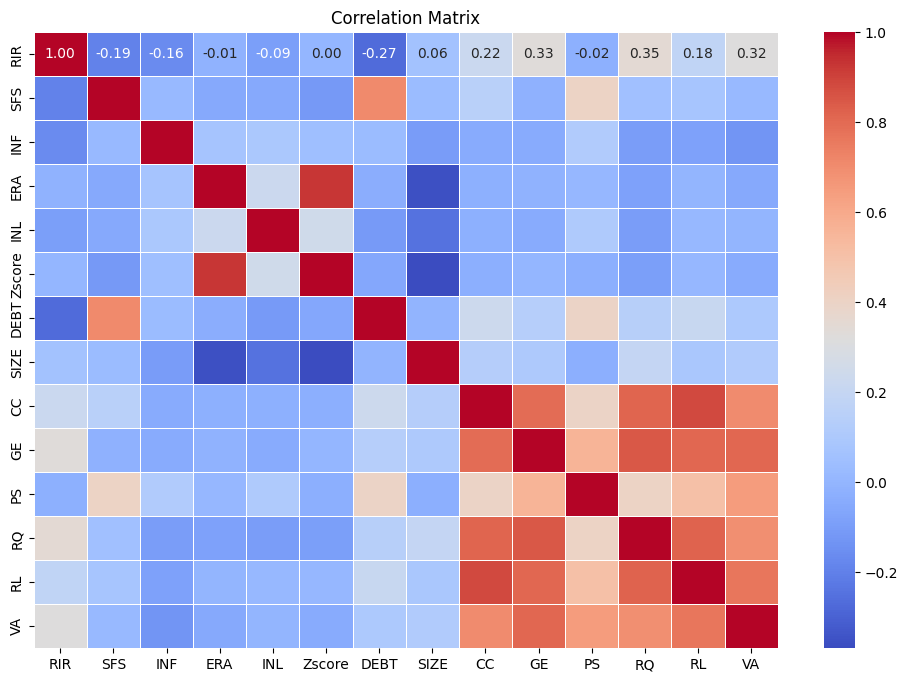

In [14]:
# calculate the correlation matrix
correlation_matrix = uemoa_df[metrics].corr()

# visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt=".2f", linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

**Have decided to exclude from our metrics those variables that show a high correlation with other variables to avoid biased 
results**

In [15]:
# Identify highly correlated pairs
high_corr_pairs = (correlation_matrix.abs() > 0.8) & (correlation_matrix < 1.0)

# Get the names of the highly correlated variables
high_corr_variables = [(var1, var2) for var1 in correlation_matrix.columns
                       for var2 in correlation_matrix.columns
                       if high_corr_pairs.loc[var1, var2]]
print("Highly Correlated Variables:")
for pair in high_corr_variables:
    print(pair)

Highly Correlated Variables:
('ERA', 'Zscore')
('Zscore', 'ERA')
('CC', 'RQ')
('CC', 'RL')
('GE', 'RQ')
('GE', 'RL')
('GE', 'VA')
('RQ', 'CC')
('RQ', 'GE')
('RQ', 'RL')
('RL', 'CC')
('RL', 'GE')
('RL', 'RQ')
('VA', 'GE')


In [16]:
to_remove = ['ERA', 'RQ', 'RL', 'GE']
# removing highly correlated variables
uemoa_df_filtered = uemoa_df.drop(columns=to_remove)
# display remaining metrics
uemoa_df_filtered.columns

Index(['Countries_Num', 'id', 'Countries', 'Banks', 'Year', 'RIR', 'SFS',
       'INF', 'INL', 'Zscore', 'DEBT', 'SIZE', 'CC', 'PS', 'VA',
       'Outlier_Label'],
      dtype='object')

## 3. Selecting clustering procedure

The chosen clustering technique is Agglomerative Hierarchical Clustering, which is employed due to its ability to group similar banks without requiring a predetermined number of clusters. In the agglomerative approach, each credit institution is initially placed in its own individual cluster. Subsequently, the algorithm iteratively merges clusters based on pairwise distances, resulting in the formation of successively larger clusters. This agglomerative method allows for the creation of a hierarchical structure, visually represented as a dendrogram.

Agglomerative Clustering, by progressively merging clusters according to pairwise distances, provides flexibility and effectiveness in exploratory analysis. It offers valuable insights into the inherent grouping patterns of data points, making it a suitable choice for understanding the natural structure within the dataset.en

## 4. Selecting method for data aggregation
We will apply 3 methods comparatively ;

- Single linkage. Determines the distance between two clusters by the distance of the two closest objects in the different clusters (nearest neighbor).
  
- Complete linkage. Joins two clusters characterized by the greatest distance between any two objects in the different clusters (furthest neighbor). This method is usually employed when the entities actually form naturally distinctive groups.
  
- Centroid clustering. Statutes that the distance between two clusters is determined as the difference between their centroids, the centroid being the average point in the multidimensional space of a cluster.

Each linkage method has its own characteristics and is suitable for diffrent types of data or cluster structures. 
For example, to form compact well-separated clusters, complete linkage is a good choice. To emphasize connectivity between points, single linkage could be appropriate. If looking for a balance and less sensitivity to outliers, centroid clustering is a suitable option.

## 5. Choosing the unit of measurement for the distance between entities.
As a measure for the distance between credit institutions, we have decided to employ the squared Euclidean distance because, in the process of group building, the distinction between them is made according to the characteristics of the outlier banks. 
The studies of Wolfson (2004), Gutierrez and Sorensen (2006) propose the same approach.

## 6. Identification of optimum number of clusters

#### With all the outliers present

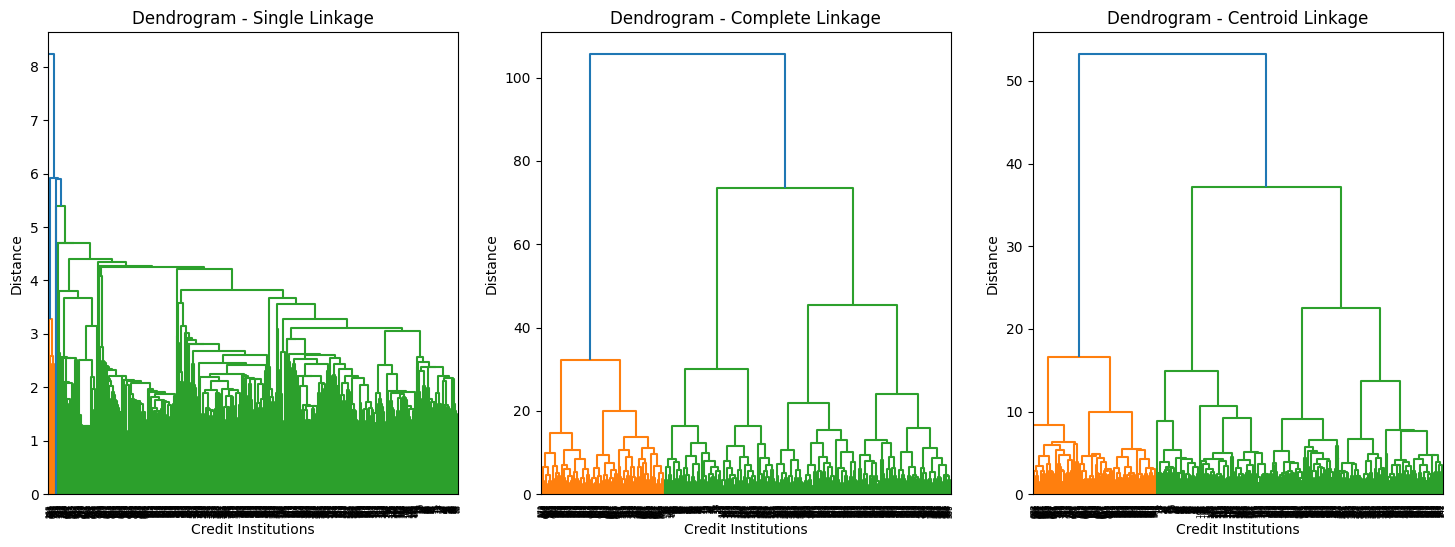

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

data = uemoa_df_filtered
# removing text data
data = data.drop(columns= ['Countries', 'Banks', 'Outlier_Label'])
linkage_methods = ['single', 'complete', 'centroid']

# Create subplots for each linkage method
plt.figure(figsize=(18, 6))
for i, method in enumerate(linkage_methods, 1):
    plt.subplot(1, 3, i)
    linkage_matrix = linkage(data, method=method)
    dendrogram(linkage_matrix)
    plt.title(f'Dendrogram - {method.capitalize()} Linkage')
    plt.xlabel('Credit Institutions')
    plt.ylabel('Distance')

plt.show()


Single Linkage: This method has many branches indicating a large number of clusters at lower distance levels.

Complete Linkage: This method shows fewer, more distinct clusters compared to the single linkage method.

Centroid Linkage: This method also displays distinct clusters similar to complete linkage but with variations in cluster formations and distances.

#### Check for optimum number of clusters without the outliers

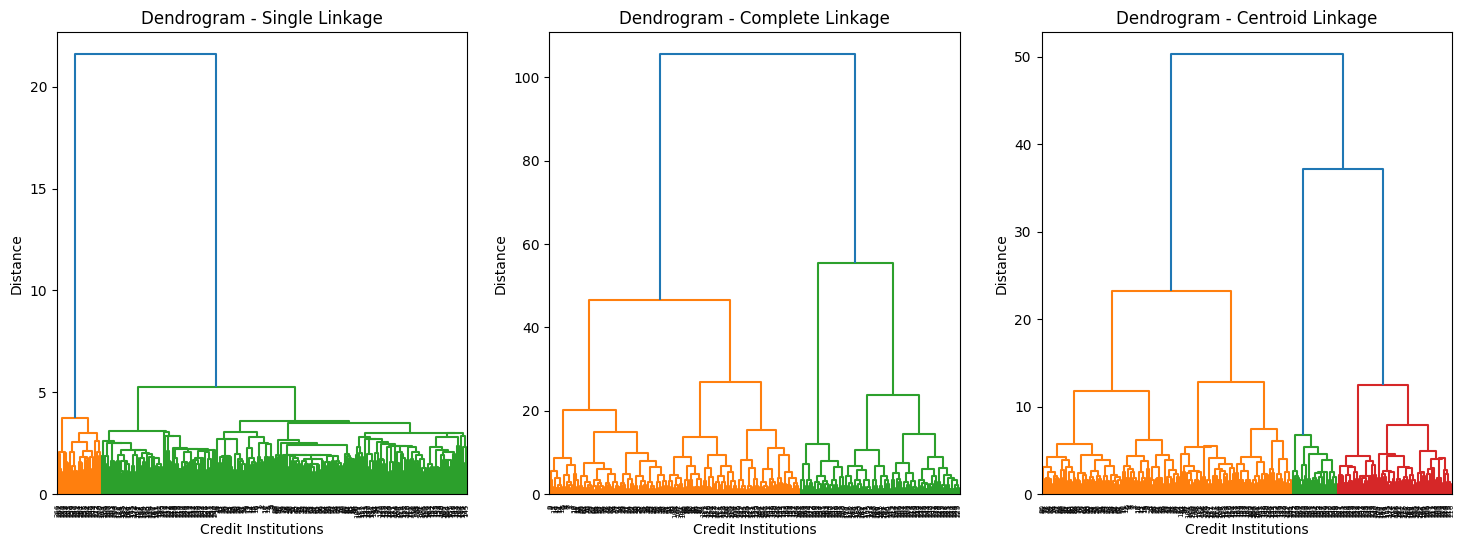

In [18]:
# Remove rows with outliers for clustering
cleaned_data = uemoa_df[(uemoa_df_filtered['Outlier_Label'] == 'Not Outlier')]

# Select only the metrics columns for clustering
data = cleaned_data.drop(columns= ['Countries', 'Banks', 'Outlier_Label'])

linkage_methods = ['single', 'complete', 'centroid']

# Create subplots for each linkage method
plt.figure(figsize=(18, 6))
for i, method in enumerate(linkage_methods, 1):
    plt.subplot(1, 3, i)

    # Use the cleaned data without outliers for clustering
    linkage_matrix = linkage(data, method=method)

    # Plot the dendrogram
    dendrogram(linkage_matrix)
    
    plt.title(f'Dendrogram - {method.capitalize()} Linkage')
    plt.xlabel('Credit Institutions')
    plt.ylabel('Distance')

plt.show()


### Check for optimum number of clusters for only values that have outliers

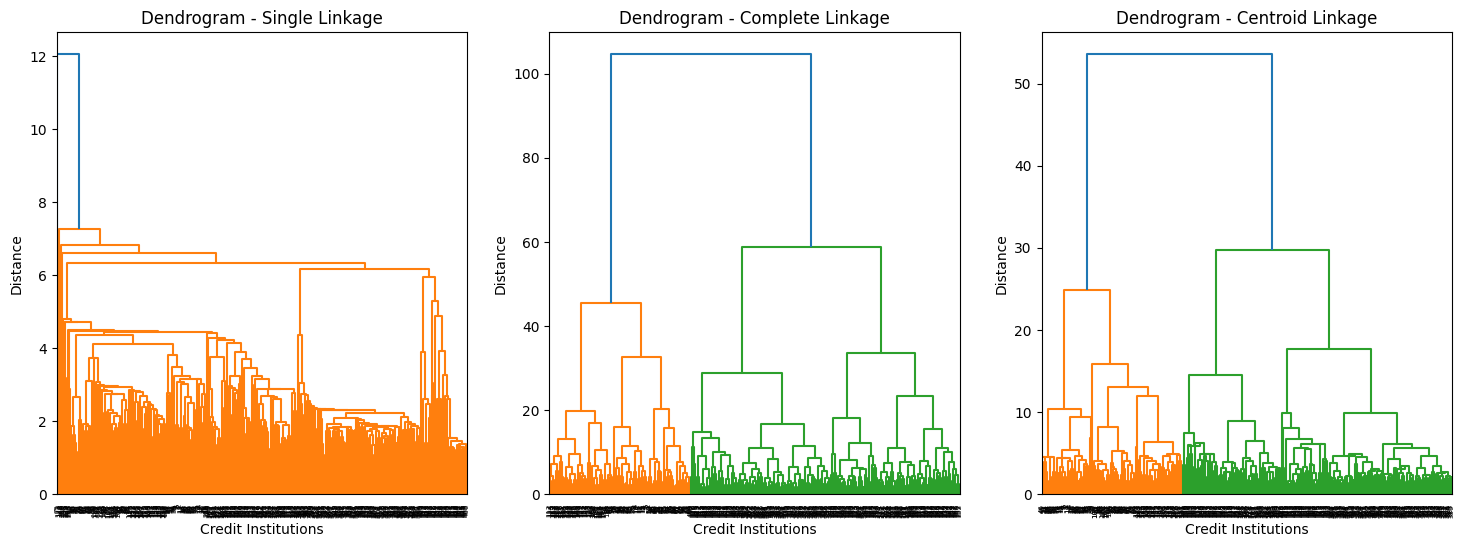

In [19]:
# Remove rows with outliers for clustering
cleaned_data = uemoa_df[(uemoa_df_filtered['Outlier_Label'] != 'Not Outlier')]

# Select only the metrics columns for clustering
data = cleaned_data.drop(columns= ['Countries', 'Banks', 'Outlier_Label'])

linkage_methods = ['single', 'complete', 'centroid']

# Create subplots for each linkage method
plt.figure(figsize=(18, 6))
for i, method in enumerate(linkage_methods, 1):
    plt.subplot(1, 3, i)

    # Use the cleaned data without outliers for clustering
    linkage_matrix = linkage(data, method=method)

    # Plot the dendrogram
    dendrogram(linkage_matrix)
    
    plt.title(f'Dendrogram - {method.capitalize()} Linkage')
    plt.xlabel('Credit Institutions')
    plt.ylabel('Distance')

plt.show()


### Selecting the optimum number of clusters

Cophenetic Correlation Coefficient: 2.8670863592997473
Optimal Number of Clusters using Gap Statistics: 5


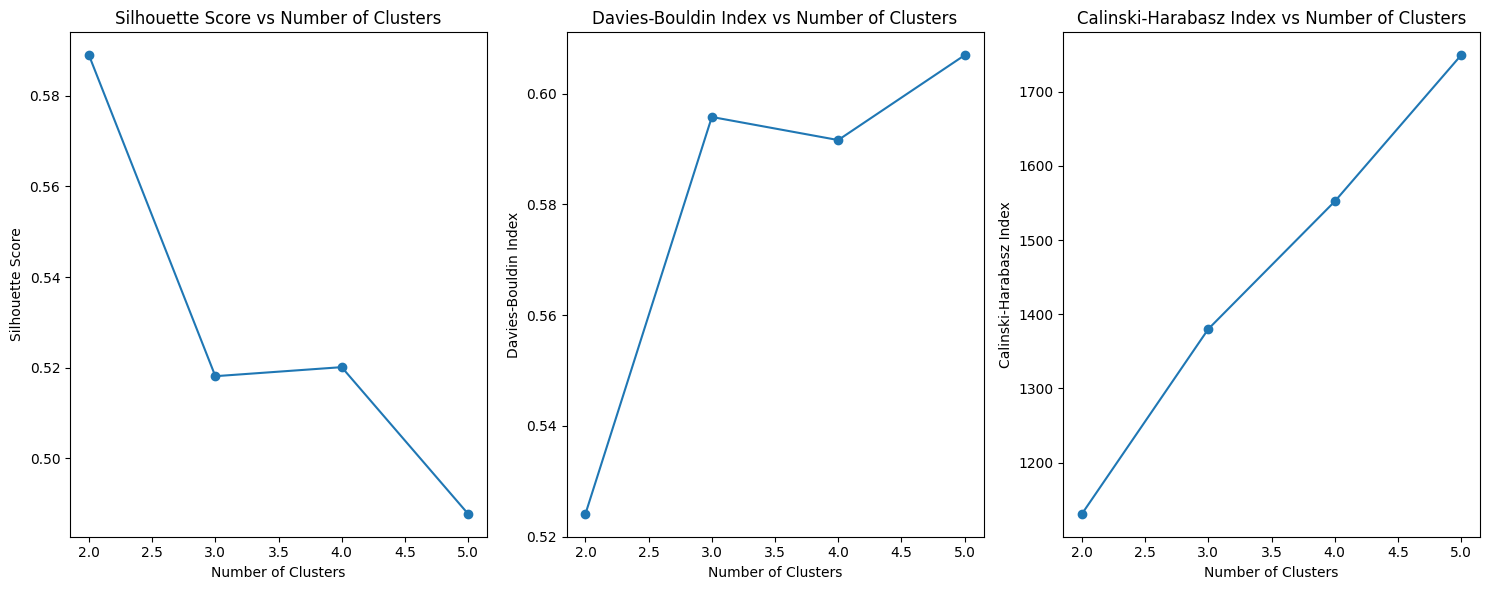

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from gap_statistic import OptimalK
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Hierarchical clustering linkage method
linkage_method = 'centroid'

# Calculate linkage matrix
linkage_matrix = linkage(data, method=linkage_method)

# Create subplots for each metric
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

# 1. Cophenetic Correlation Coefficient
coph_corr_coeff = linkage_matrix[:, 2].mean()
print(f'Cophenetic Correlation Coefficient: {coph_corr_coeff}')

# 2. Silhouette Score
silhouette_scores = []
for i in range(2, 6):  # Assuming a maximum of 5 clusters
    clusters = fcluster(linkage_matrix, t=i, criterion='maxclust')
    silhouette_avg = silhouette_score(data, clusters)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score
axs[0].plot(range(2, 6), silhouette_scores, marker='o')
axs[0].set_title('Silhouette Score vs Number of Clusters')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('Silhouette Score')

# 3. Gap Statistics
optimal_k = OptimalK(parallel_backend='joblib')
n_clusters = optimal_k(data, cluster_array=np.arange(1, 6))
print(f'Optimal Number of Clusters using Gap Statistics: {n_clusters}')

# 4. Davies-Bouldin Index
davies_bouldin_scores = []
for i in range(2, 6):
    clusters = fcluster(linkage_matrix, t=i, criterion='maxclust')
    davies_bouldin_score_i = davies_bouldin_score(data, clusters)
    davies_bouldin_scores.append(davies_bouldin_score_i)

# Plot Davies-Bouldin Index
axs[1].plot(range(2, 6), davies_bouldin_scores, marker='o')
axs[1].set_title('Davies-Bouldin Index vs Number of Clusters')
axs[1].set_xlabel('Number of Clusters')
axs[1].set_ylabel('Davies-Bouldin Index')

# 5. Calinski-Harabasz Index
calinski_harabasz_scores = []
for i in range(2, 6):
    clusters = fcluster(linkage_matrix, t=i, criterion='maxclust')
    calinski_harabasz_score_i = calinski_harabasz_score(data, clusters)
    calinski_harabasz_scores.append(calinski_harabasz_score_i)

# Plot Calinski-Harabasz Index
axs[2].plot(range(2, 6), calinski_harabasz_scores, marker='o')
axs[2].set_title('Calinski-Harabasz Index vs Number of Clusters')
axs[2].set_xlabel('Number of Clusters')
axs[2].set_ylabel('Calinski-Harabasz Index')

plt.tight_layout()
plt.show()


## Visualizing cluster distribution

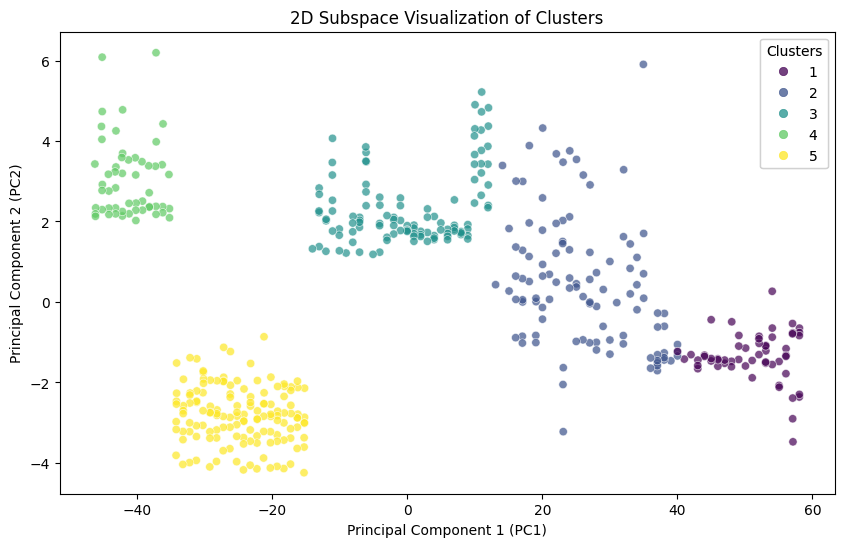

In [21]:
from sklearn.decomposition import PCA

# Assuming 'data' is your standardized data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Specify the desired number of clusters
desired_num_clusters = 5

# Determine clusters based on the specified number
clusters = fcluster(linkage_matrix, t=desired_num_clusters, criterion='maxclust')

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Plotting the 2D subspace with clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x='PC1', y='PC2', c='Cluster', data=pca_df, cmap='viridis', alpha=0.7, edgecolors='w', linewidths=0.5)

# Adding legend
legend = plt.legend(*scatter.legend_elements(), title='Clusters')
plt.gca().add_artist(legend)

# Adding labels and title
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('2D Subspace Visualization of Clusters')
plt.show()


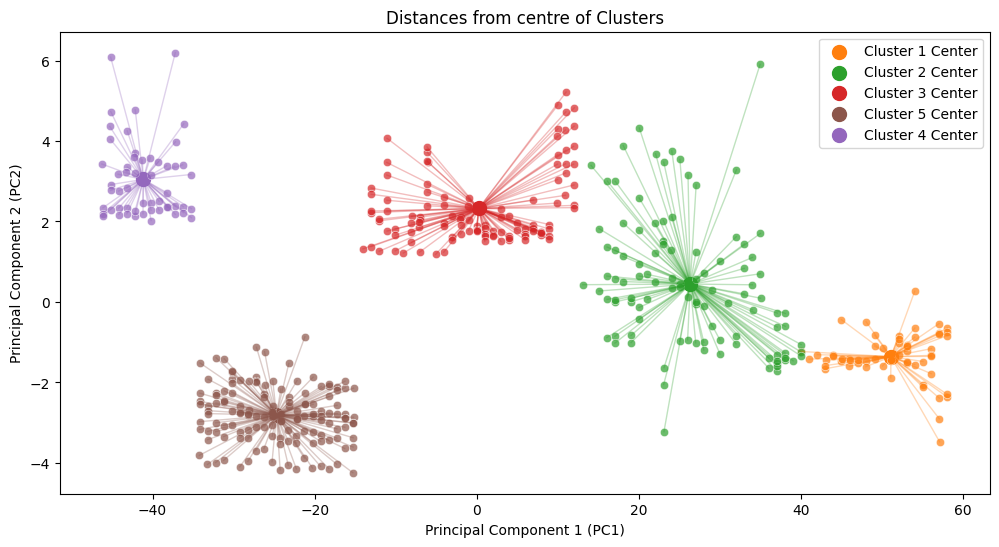

In [22]:
# Plotting distances from centre of cluster
plt.figure(figsize=(12, 6))

# Iterate over unique cluster labels
for cluster_label in pca_df['Cluster'].unique():
    cluster_points = pca_df[pca_df['Cluster'] == cluster_label][['PC1', 'PC2']]
    cluster_center = cluster_points.mean()
    
    # Plotting the center of the cluster
    plt.scatter(cluster_center['PC1'], cluster_center['PC2'], marker='o', color=f'C{cluster_label}', label=f'Cluster {cluster_label} Center', s=100)

    # Plotting the points in the cluster
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], color=f'C{cluster_label}', alpha=0.7, edgecolor='w', linewidth=0.5)

    # Connecting each point to the center of the cluster
    for index, point in cluster_points.iterrows():
        plt.plot([point['PC1'], cluster_center['PC1']], [point['PC2'], cluster_center['PC2']], color=f'C{cluster_label}', linestyle='-', linewidth=1, alpha=0.3)

# Adding legend
plt.legend()

# Adding labels and title
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Distances from centre of Clusters')

plt.show()


After exploring various combinations of cluster numbers and methods, I observed that centroid clustering consistently produced more distinct clusters. Through this iterative process, I identified that using 4 clusters yields optimal results. This choice strikes a balance by minimizing variance within each cluster while allowing for more substantial variance outside the clusters, particularly concerning the principal component elements on the scale. The selection of centroid clustering with 4 clusters appears to offer a favorable trade-off in terms of cluster distinctiveness and overall data variance.

# 7. Generating the clusters

#### Assigning clusters to original dataframe

In [23]:
# using the orginal dataframe
data = uemoa_df_filtered.drop(columns=['Countries', 'Banks','Outlier_Label'])

# Perform hierarchical clustering
linkage_matrix = linkage(data, method='centroid')

num_clusters = 5

clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Add cluster labels to the original DataFrame
uemoa_df_filtered['Cluster'] = clusters

# Display the updated DataFrame with cluster labels
print("Dataset with Cluster Labels:")
uemoa_df_filtered.head(3)


Dataset with Cluster Labels:


,Countries_Num,id,Countries,Banks,Year,RIR,SFS,INF,INL,Zscore,DEBT,SIZE,CC,PS,VA,Outlier_Label,Cluster
0,1,1,Bénin,Banque Atlantique Bénin,2013,0.030398,-0.619813,-0.075473,0.038999,-0.389639,-1.739593,0.130214,-1.005347,2.335223,1.337081,Not Outlier,3
1,1,1,Bénin,Banque Atlantique Bénin,2014,0.459313,-0.242886,-0.846236,-0.254408,-0.365178,-1.415444,0.173776,-0.594954,1.578303,1.452254,Not Outlier,3
2,1,1,Bénin,Banque Atlantique Bénin,2015,0.134925,-0.119084,-0.241115,-0.282077,-0.452934,-0.676080,0.389507,-0.327455,1.449009,1.585820,Not Outlier,3


#### Generating average cluster metrics

In [24]:

cluster_labels = uemoa_df_filtered['Cluster']
# drop text columns
cluster_metrics = uemoa_df_filtered.drop(columns = ['Countries_Num', 'id', 'Countries', 'Banks', 'Year', 'Outlier_Label'])

# Calculate average metrics for each cluster
average_metrics = cluster_metrics.groupby('Cluster').mean()

# Display the average metrics for each cluster
print("Average Metrics for Each Cluster:")
average_metrics


Average Metrics for Each Cluster:


,RIR,SFS,INF,INL,Zscore,DEBT,SIZE,CC,PS,VA
Cluster,,,,,,,,,,
1,-1.276642,1.589105,0.320632,0.087552,-0.053478,1.186799,-0.254748,-1.099678,0.326917,-1.247533
2,0.263235,0.537003,0.051566,0.145298,0.054837,1.057665,0.008727,1.547179,1.240030,1.334510
3,0.372948,0.019080,-0.182255,-0.095760,-0.141604,-0.529137,0.218087,0.235067,0.261208,0.462965
4,0.094572,-1.235103,0.000685,0.002793,0.429810,-0.574029,-0.274538,-0.645994,-1.021765,-0.436474
5,-0.092687,-0.307776,0.015567,-0.045028,-0.148275,-0.360141,0.052934,-0.483791,-0.670006,-0.645102


#### Charts for metrics averaged by cluster

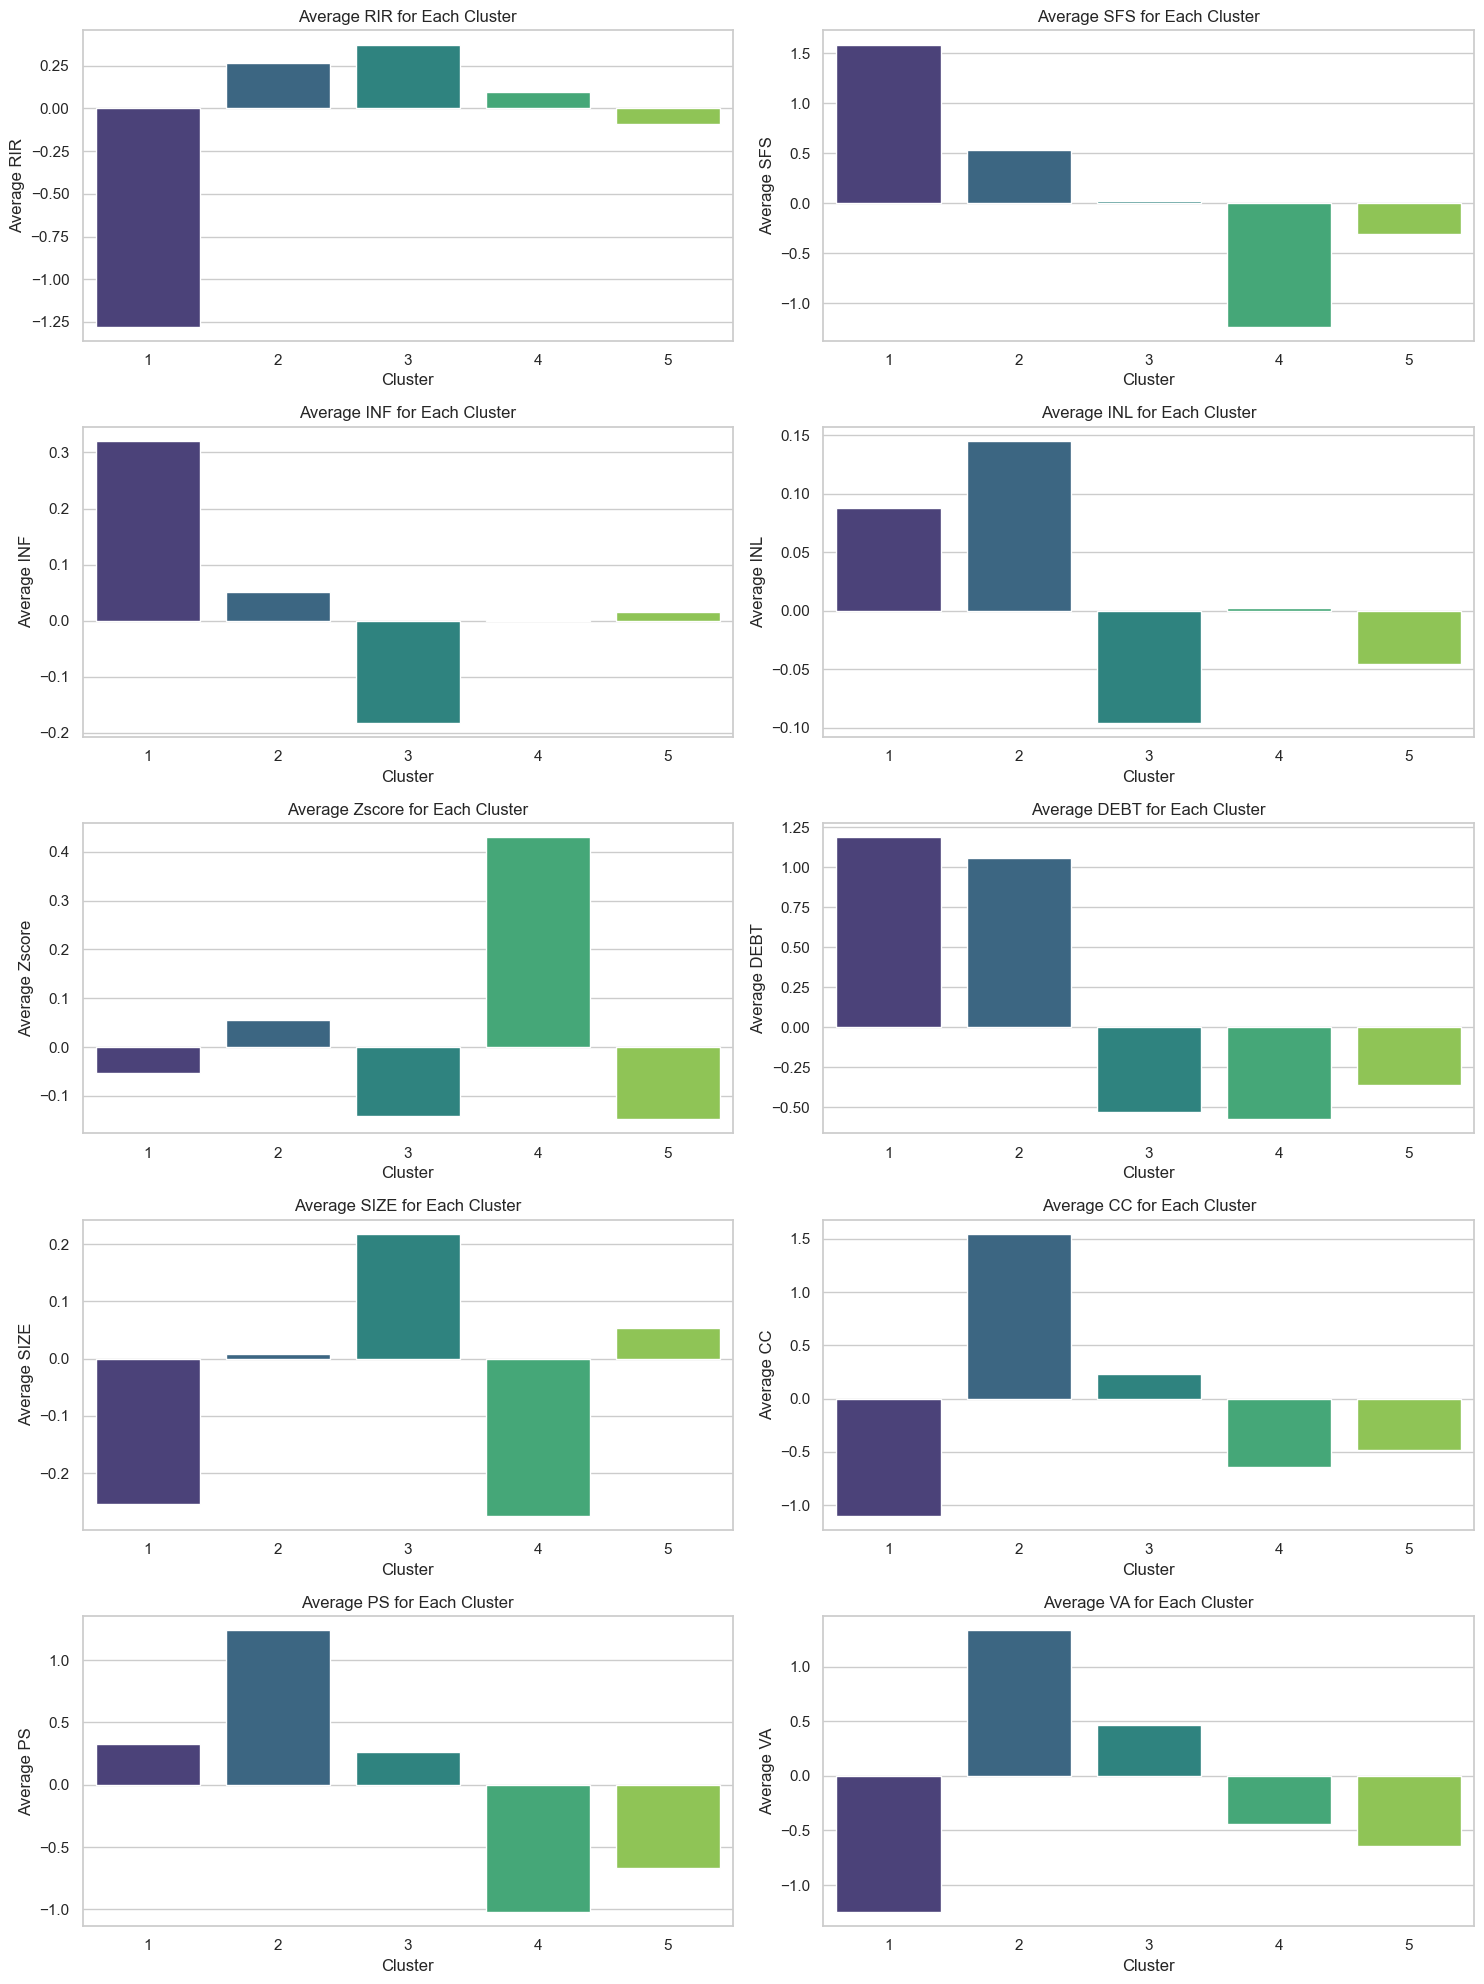

In [25]:
from math import ceil

# Set the style of seaborn
sns.set(style="whitegrid")

# Define the metrics you want to visualize
metrics = ['RIR', 'SFS', 'INF', 'INL', 'Zscore', 'DEBT', 'SIZE', 'CC', 'PS', 'VA']

# Calculate the number of rows and columns for subplots
num_metrics = len(metrics)
num_rows = ceil(num_metrics / 2)
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot average metrics for each cluster in subplots
for i, metric in enumerate(metrics):
    sns.barplot(data=average_metrics.reset_index(), x='Cluster', y=metric, palette='viridis', ci=None, ax=axes[i])
    axes[i].set_title(f'Average {metric} for Each Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(f'Average {metric}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


**Cluster 1: Conservative and Stable**

This cluster represents banks with a conservative approach to risk management, as indicated by a significantly low risk index rating. Solvency and financial stability are high, reflecting a focus on maintaining a secure financial position. The moderate level of inflation rate sensitivity suggests a cautious stance in response to economic factors. Internationalization level is moderate, indicating a balanced approach to global involvement. Financial health is conservative with a slightly negative Z-score, and there is a higher level of debt. The cluster comprises moderate-sized banks with a conservative capital position. Profitability and sustainability are moderate, and the value-added contribution to the economy is lower, reflecting a conservative business impact.

**Cluster 2: Growth-oriented and Profitable**

Banks in this cluster exhibit a balanced approach to risk management with a moderate risk index rating. Solvency and financial stability are moderate, reflecting a balanced financial position. Inflation rate sensitivity is relatively low, suggesting a focus on factors other than inflation in decision-making. The moderate internationalization level indicates a balanced approach to global involvement. The Z-score is positive, reflecting a healthy financial health assessment. Banks have a moderate level of debt and size, indicating a balanced scale of operations. Capital adequacy is high, suggesting a strong capital position. Profitability and sustainability are high, and the value-added contribution to the economy is high, indicating a focus on growth and profitability.

**Cluster 3: Balanced and Moderate**

This cluster represents banks with a balanced approach to risk management, moderate solvency, and financial stability. Inflation rate sensitivity is low, and the internationalization level is also low, indicating a focus on domestic operations. The Z-score is slightly negative, reflecting a conservative financial health assessment. Banks in this cluster have a low level of debt and a moderate size, suggesting a balanced scale of operations. Capital adequacy is moderate, indicating a stable capital position. Profitability and sustainability are moderate, and the value-added contribution to the economy is also moderate.

**Cluster 4: Profitability-focused and Cautious**

Banks in this cluster demonstrate a balanced approach to risk management, with a moderate risk index rating. Solvency and financial stability are low, indicating a cautious financial position. Low inflation rate sensitivity and internationalization level suggest a conservative stance. The Z-score is slightly positive, reflecting a relatively healthy financial health assessment. Banks have a low level of debt, indicating a conservative approach to leveraging. This cluster comprises smaller-sized banks with a conservative capital position. Profitability and sustainability are high, and the value-added contribution to the economy is high, indicating a focus on maximizing profitability.

**Cluster 5: Conservative and Stable**

Similar to Cluster 1, this cluster represents banks with a conservative approach to risk management, as indicated by a slightly negative risk index rating. Solvency and financial stability are moderate, reflecting a balanced financial position. Low inflation rate sensitivity and internationalization level suggest a conservative stance. The Z-score is slightly negative, reflecting a conservative financial health assessment. Banks have a low level of debt and a moderate size, indicating a balanced scale of operations. Capital adequacy is moderate, indicating a stable capital position. Profitability and sustainability are moderate, and the value-added contribution to the economy is also moderate. The differences between Cluster 1 and Cluster 5 lie in nuanced variations in risk aversion and financial metrics.

**Cluster 1 vs. Cluster 5: Key Differences**

- **Financial Stability:**
  - **Cluster 1:** High solvency and financial stability, emphasizing a secure financial position.
  - **Cluster 5:** Moderate solvency and financial stability, suggesting a balanced financial approach.

- **Inflation Sensitivity:**
  - **Cluster 1:** Moderate inflation rate sensitivity, demonstrating a cautious stance toward economic factors.
  - **Cluster 5:** Low inflation rate sensitivity, indicating a conservative approach less affected by inflation.

- **Internationalization:**
  - **Cluster 1:** Moderate internationalization level, showcasing a balanced approach to global involvement.
  - **Cluster 5:** Low internationalization level, suggesting a more domestically focused strategy.

- **Financial Health:**
  - **Cluster 1:** Conservative financial health with a slightly negative Z-score and higher debt levels.
  - **Cluster 5:** Conservative financial health with a slightly negative Z-score, but lower debt levels compared to Cluster 1

In [26]:
# Create an empty dictionary to store results
cluster_country_counts = {}

# Overall dataset counts
total_banks_counts = uemoa_df_filtered.groupby('Countries')['Banks'].nunique().reset_index()
total_banks_counts.columns = ['Countries', 'Total Banks']

# Iterate over unique clusters
for cluster_label in uemoa_df_filtered['Cluster'].unique():
    # Filter data for the specific cluster
    cluster_data = uemoa_df_filtered[uemoa_df_filtered['Cluster'] == cluster_label]
    
    # Count the number of banks for each country in the cluster
    country_counts = cluster_data.groupby('Countries')['Banks'].nunique().reset_index()
    country_counts.columns = ['Countries', 'Number of Banks']  # Rename columns
    
    # Merge with overall counts
    country_counts = pd.merge(country_counts, total_banks_counts, on='Countries', how='left')
    
    # Store results in the dictionary
    cluster_country_counts[f'Cluster {cluster_label}'] = {'Country Bank Counts': country_counts}

# Display the results as DataFrames
for cluster, results in cluster_country_counts.items():
    df_country_counts = pd.DataFrame(results['Country Bank Counts'])
    
    print(f"\n{cluster} - Number of Banks in Each Country:")
    display(df_country_counts)
    print("\n")



Cluster 3 - Number of Banks in Each Country:


,Countries,Number of Banks,Total Banks
0,Burkina Faso,13,13
1,Bénin,11,11
2,Côte d'Ivoire,6,23





Cluster 5 - Number of Banks in Each Country:


,Countries,Number of Banks,Total Banks
0,Côte d'Ivoire,18,23
1,GUINEE-BISSAU,3,3
2,Mali,7,13





Cluster 4 - Number of Banks in Each Country:


,Countries,Number of Banks,Total Banks
0,Mali,8,13
1,Niger,11,11





Cluster 2 - Number of Banks in Each Country:


,Countries,Number of Banks,Total Banks
0,Sénégal,20,20





Cluster 1 - Number of Banks in Each Country:


,Countries,Number of Banks,Total Banks
0,Togo,12,12


### Distribution of the Banks according to clusters

In [27]:

# Create an empty dictionary to store results
cluster_results = {}

# Iterate over unique clusters
for cluster_label in uemoa_df_filtered['Cluster'].unique():
    # Filter data for the specific cluster
    cluster_data = uemoa_df_filtered[uemoa_df_filtered['Cluster'] == cluster_label]
    
    # Extract unique banks and countries in the cluster
    unique_banks = cluster_data.groupby('Banks')['Countries'].unique().reset_index()
    
    # Store results in the dictionary
    cluster_results[f'Cluster {cluster_label}'] = {'Unique Banks': unique_banks}

# Display the results as DataFrames
for cluster, results in cluster_results.items():
    df_banks = pd.DataFrame(results['Unique Banks'], columns=['Banks', 'Countries'])
    
    print(f"{cluster} - Unique Banks and Countries:")
    display(df_banks)
    print("\n")


Cluster 3 - Unique Banks and Countries:


,Banks,Countries
0,AFRILAND FIRST BANK (ex ACCES BANK),[Côte d'Ivoire]
1,BGFI BANK,[Côte d'Ivoire]
2,Bank Of Africa-Bénin,[Bénin]
3,Bank of Africa-Burkina,[Burkina Faso]
4,Banque Atlantique Bénin,[Bénin]
5,Banque Atlantique Côte d'Ivoire (BACI),[Côte d'Ivoire]
6,Banque Atlantique – Burkina Faso,[Burkina Faso]
7,Banque Commerciale du Burkina,[Burkina Faso]
8,Banque Internationale du Bénin,[Bénin]
9,Banque Internationale pour le Commerce et l'In...,[Côte d'Ivoire]




Cluster 5 - Unique Banks and Countries:


,Banks,Countries
0,Banco Da Africa Ocidental (BAO),[GUINEE-BISSAU]
1,Banco Da União (BDU-SA),[GUINEE-BISSAU]
2,Bank Of Africa-Côte d'Ivoire (BOA-CI),[Côte d'Ivoire]
3,Banque Atlantique – Mali,[Mali]
4,Banque Commerciale du Sahel (B.C.S.),[Mali]
5,Banque Internationale pour le Commerce et l'In...,[Mali]
6,Banque Internationale pour le Mali,[Mali]
7,Banque Malienne de Solidarité,[Mali]
8,Banque Nationale d'Investissement (BNI),[Côte d'Ivoire]
9,Banque Sahélo-Saharienne pour l'Investissement...,[Côte d'Ivoire]




Cluster 4 - Unique Banks and Countries:


,Banks,Countries
0,Bank Of Africa-Mali,[Mali]
1,Bank Of Africa-Niger,[Niger]
2,Banque Agricole du Niger,[Niger]
3,Banque Atlantique-Niger,[Niger]
4,Banque Commerciale du Niger,[Niger]
5,Banque Internationale pour l'Afrique au Niger,[Niger]
6,Banque Internationale pour le Mali,[Mali]
7,Banque Islamique du Niger,[Niger]
8,Banque Malienne de Solidarité,[Mali]
9,Banque Nationale de Développement Agricole,[Mali]




Cluster 2 - Unique Banks and Countries:


,Banks,Countries
0,BGFI-Bank Sénégal,[Sénégal]
1,Bank Of Africa-Sénégal,[Sénégal]
2,Banque Atlantique – Sénégal,[Sénégal]
3,Banque Internationale pour le Commerce et l'In...,[Sénégal]
4,Banque Islamique du Sénégal,[Sénégal]
5,Banque Nationale pour le Développement Economi...,[Sénégal]
6,Banque Sahélo-Saharienne pour l'Investissement...,[Sénégal]
7,Banque de Dakar (BDK),[Sénégal]
8,Banque pour le Commerce et l'Industrie du Mali...,[Sénégal]
9,Citibank Sénégal,[Sénégal]




Cluster 1 - Unique Banks and Countries:


,Banks,Countries
0,Bank Of Africa-Togo,[ Togo]
1,Banque Atlantique – Togo,[ Togo]
2,Banque Internationale pour l'Afrique au Togo,[ Togo]
3,Banque Sahélo-Saharienne pour l'Investissement...,[ Togo]
4,Banque Togolaise pour le Commerce et l'Industrie,[ Togo]
5,Coris Bank International Togo,[ Togo]
6,Ecobank-Togo,[ Togo]
7,ORABANK-Togo,[ Togo]
8,Société Interafricaine de Banque,[ Togo]
9,Succursale de NSIA Banque au Togo,[ Togo]


### Distribution of bank clusters in different countries

In [28]:
# Create an empty dictionary to store results
cluster_country_counts = {}

# Overall dataset counts
total_banks_counts = uemoa_df_filtered.groupby('Countries')['Banks'].nunique().reset_index()
total_banks_counts.columns = ['Countries', 'Total Banks']

# Iterate over unique clusters
for cluster_label in uemoa_df_filtered['Cluster'].unique():
    # Filter data for the specific cluster
    cluster_data = uemoa_df_filtered[uemoa_df_filtered['Cluster'] == cluster_label]
    
    # Count the number of banks for each country in the cluster
    country_counts = cluster_data.groupby('Countries')['Banks'].nunique().reset_index()
    country_counts.columns = ['Countries', 'Number of Banks']  # Rename columns
    
    # Merge with overall counts
    country_counts = pd.merge(country_counts, total_banks_counts, on='Countries', how='left')
    
    # Store results in the dictionary
    cluster_country_counts[f'Cluster {cluster_label}'] = {'Country Bank Counts': country_counts}

# Display the results as DataFrames
for cluster, results in cluster_country_counts.items():
    df_country_counts = pd.DataFrame(results['Country Bank Counts'])
    
    print(f"\n{cluster} - Number of Banks in Each Country:")
    display(df_country_counts)
    print("\n")



Cluster 3 - Number of Banks in Each Country:


,Countries,Number of Banks,Total Banks
0,Burkina Faso,13,13
1,Bénin,11,11
2,Côte d'Ivoire,6,23





Cluster 5 - Number of Banks in Each Country:


,Countries,Number of Banks,Total Banks
0,Côte d'Ivoire,18,23
1,GUINEE-BISSAU,3,3
2,Mali,7,13





Cluster 4 - Number of Banks in Each Country:


,Countries,Number of Banks,Total Banks
0,Mali,8,13
1,Niger,11,11





Cluster 2 - Number of Banks in Each Country:


,Countries,Number of Banks,Total Banks
0,Sénégal,20,20





Cluster 1 - Number of Banks in Each Country:


,Countries,Number of Banks,Total Banks
0,Togo,12,12


### Evolution of the number of banks in each cluster over the years

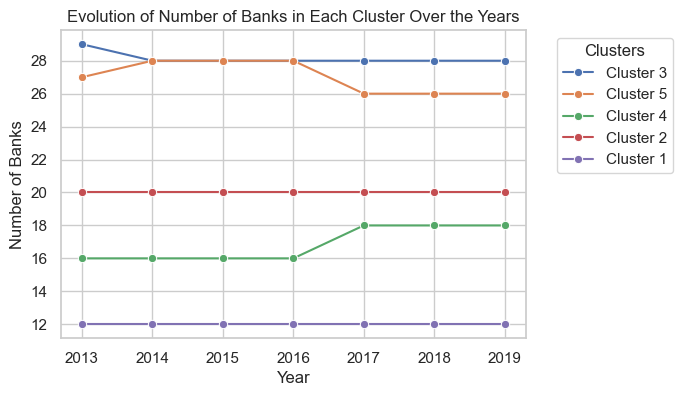

In [29]:
from matplotlib.ticker import MaxNLocator

# Set the style for the plots
sns.set(style="whitegrid")

# Get unique clusters
unique_clusters = uemoa_df_filtered['Cluster'].unique()

# Create a single plot
fig, ax = plt.subplots(figsize=(6, 4))

# Iterate over unique clusters
for cluster_label in unique_clusters:
    # Filter data for the specific cluster
    cluster_data = uemoa_df_filtered[uemoa_df_filtered['Cluster'] == cluster_label]
    
    # Count the number of banks for each year in the cluster
    year_counts = cluster_data.groupby('Year')['Banks'].nunique().reset_index()
    
    # Plot the line for each cluster
    sns.lineplot(x='Year', y='Banks', data=year_counts, label=f'Cluster {cluster_label}', marker='o')

# Set y-axis to integer ticks
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Set plot labels and title
ax.set_ylabel('Number of Banks')
ax.set_xlabel('Year')
ax.set_title('Evolution of Number of Banks in Each Cluster Over the Years')

# Display the legend
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


### Evolution of cluster numbers in different countries

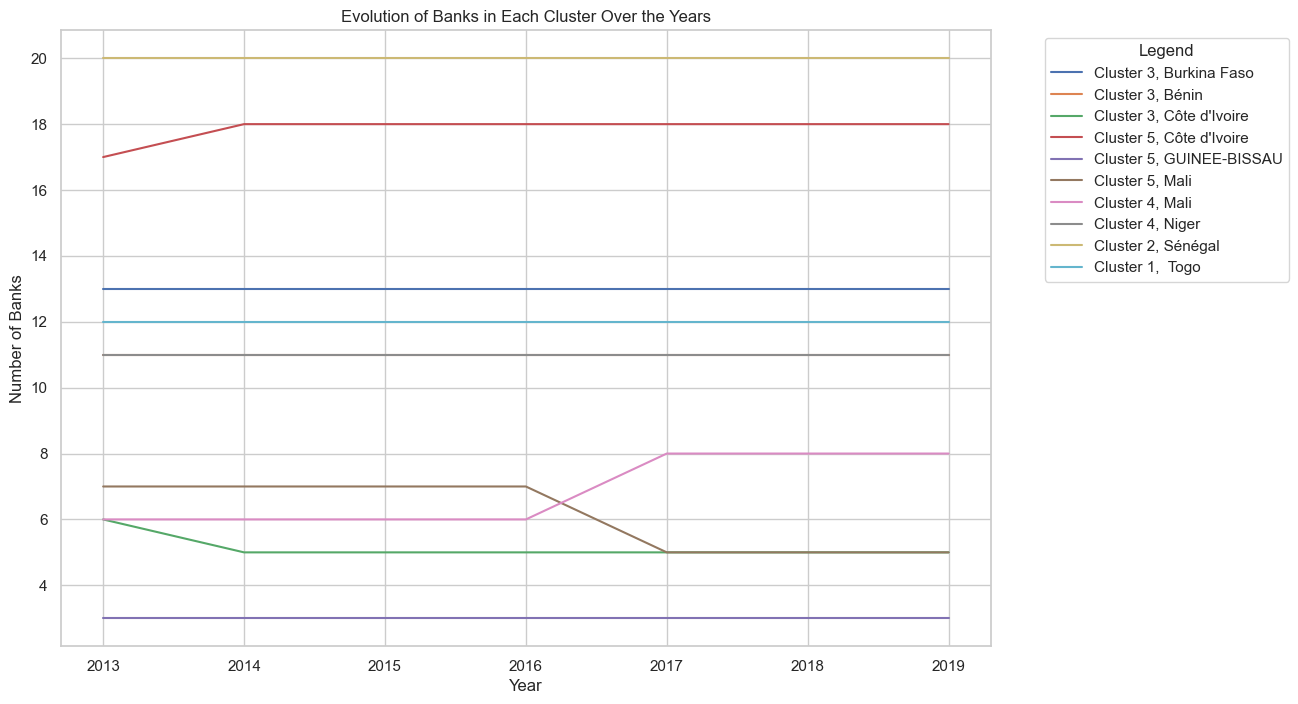

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Set the style for the plot
sns.set(style="whitegrid")

# Get unique clusters
unique_clusters = uemoa_df_filtered['Cluster'].unique()

# Create a single plot
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over unique clusters
for cluster_label in unique_clusters:
    # Filter data for the specific cluster
    cluster_data = uemoa_df_filtered[uemoa_df_filtered['Cluster'] == cluster_label]
    
    # Group data by country and year, count the number of banks in each group
    country_year_counts = cluster_data.groupby(['Countries', 'Year'])['Banks'].nunique().reset_index()
    
    # Iterate over unique countries
    for country in country_year_counts['Countries'].unique():
        # Filter data for the specific country
        country_data = country_year_counts[country_year_counts['Countries'] == country]
        
        # Plot a line for each country in the cluster
        sns.lineplot(x='Year', y='Banks', data=country_data, label=f'Cluster {cluster_label}, {country}', ax=ax)

# Set y-axis to integer ticks
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Set plot labels and title
ax.set_ylabel('Number of Banks')
ax.set_xlabel('Year')
ax.set_title('Evolution of Banks in Each Cluster Over the Years')

# Display the legend
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()
